In [17]:
import pandas as pd
import requests

SNOTEL_API = "https://wcc.sc.egov.usda.gov/awdbRestApi/services/v1/data"
station_triplet = "642:WA:SNTL"

todo: unclear how data availability aligns with reported data collection in snotel stations metadata. the api only returns data starting from 2005 even though the metadata reports a beginData for this station of 1978.

In [18]:
params = {
    'stationTriplets': station_triplet,
    'elements': 'SNWD',
    'duration': 'DAILY',
    'periodRef': 'END',
    'beginDate': "2005-01-01 00:00",
    'endDate': "2025-06-01 00:00",
}
response = requests.get(SNOTEL_API, params=params)

In [19]:
response.json()

[{'stationTriplet': '642:WA:SNTL',
  'data': [{'stationElement': {'elementCode': 'SNWD',
     'ordinal': 1,
     'durationName': 'DAILY',
     'dataPrecision': 0,
     'storedUnitCode': 'in',
     'originalUnitCode': 'in',
     'beginDate': '2005-10-11 16:00',
     'endDate': '2100-01-01 00:00',
     'derivedData': False},
    'values': [{'date': '2005-10-11', 'value': 0},
     {'date': '2005-10-12', 'value': 0},
     {'date': '2005-10-13', 'value': 0},
     {'date': '2005-10-14', 'value': 0},
     {'date': '2005-10-15', 'value': 0},
     {'date': '2005-10-16', 'value': 0},
     {'date': '2005-10-17', 'value': 0},
     {'date': '2005-10-18', 'value': 0},
     {'date': '2005-10-19', 'value': 0},
     {'date': '2005-10-20', 'value': 0},
     {'date': '2005-10-21', 'value': 0},
     {'date': '2005-10-22', 'value': 0},
     {'date': '2005-10-23', 'value': 0},
     {'date': '2005-10-24', 'value': 0},
     {'date': '2005-10-25', 'value': 0},
     {'date': '2005-10-26', 'value': 0},
     {'da

In [20]:
df = pd.DataFrame(response.json()[0]['data'][0]["values"])
df.date = pd.to_datetime(df.date)
df

,date,value
0,2005-10-11,0
1,2005-10-12,0
2,2005-10-13,0
3,2005-10-14,0
4,2005-10-15,0
...,...,...
7035,2025-05-28,54
7036,2025-05-29,53
7037,2025-05-30,51
7038,2025-05-31,49


In [21]:
df.date = pd.to_datetime(df.date)

There was a 2014-2015 snow drought, possibly due to [the blob](https://en.wikipedia.org/wiki/The_Blob_(Pacific_Ocean)).

<Axes: xlabel='date'>

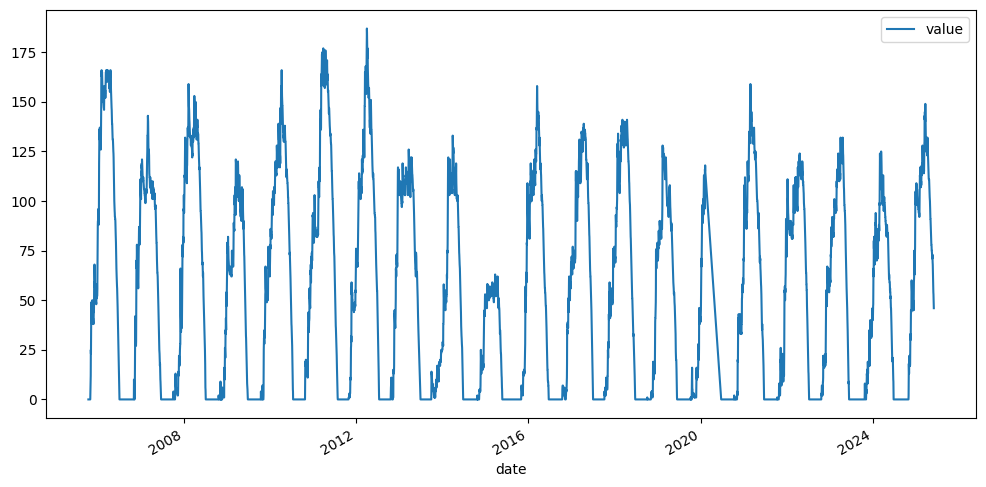

In [22]:
df.plot(x='date', y='value', figsize=(12, 6))

In [23]:
def get_season_year(date):
    month = date.month
    year = date.year
    
    if month in [11, 12, 1, 2, 3]:
        # For Nov-Dec, use current year. For Jan-Mar, use previous year
        # This groups Nov 2023 - Mar 2024 as "2023-2024"
        if month in [11, 12]:
            season_year = f"{year}-{year+1}"
        else:  # Jan, Feb, Mar
            season_year = f"{year-1}-{year}"
        return ('Nov-Mar', season_year)
    # else:
    #     return ('Other', str(year))

df['season_info'] = df['date'].apply(get_season_year)
df['season'] = df['season_info'].str[0]
df['season_year'] = df['season_info'].str[1]

# Group by both season and year
grouped = df.groupby(['season_year'])['value'].sum()
grouped

season_year
2005-2006    16318
2006-2007    13689
2007-2008    14095
2008-2009     8349
2009-2010    12849
2010-2011    13302
2011-2012    12917
2012-2013    13148
2013-2014     8219
2014-2015     5977
2015-2016    12984
2016-2017    10837
2017-2018    13362
2018-2019    10617
2019-2020     4589
2020-2021    12989
2021-2022    10395
2022-2023    11011
2023-2024     9518
2024-2025    13367
Name: value, dtype: int64

<Axes: xlabel='season_year'>

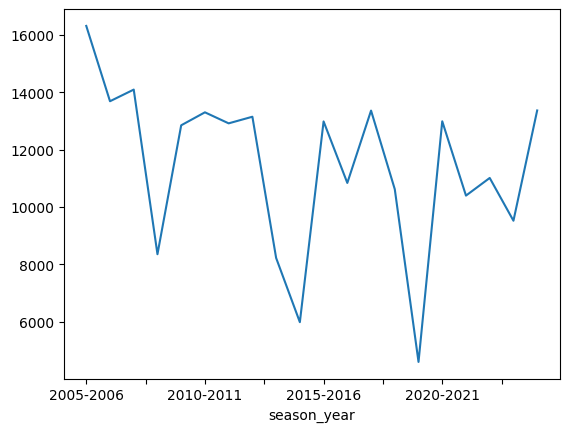

In [24]:
grouped.plot()